In [ ]:
'''

Here is the code we used to check the kaggle - '325-bird-species' dataset.

and check the number of data and imbalance.

Please cd your directory the 'What a Bird'

ex) cd "/home/what_a_bird"

'''

In [1]:
cd "/home/project/"

/home/project


In [2]:
import tensorflow as tf
from tensorflow.keras import backend, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GaussianNoise, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from vit_keras import vit

In [ ]:
'''

Here we check the number of each image and how many species there are.

After that, we check what each image looks like and how the augmentation result comes out.

'''

Found 47332 images belonging to 325 classes.
Found 1625 images belonging to 325 classes.
Found 1625 images belonging to 325 classes.


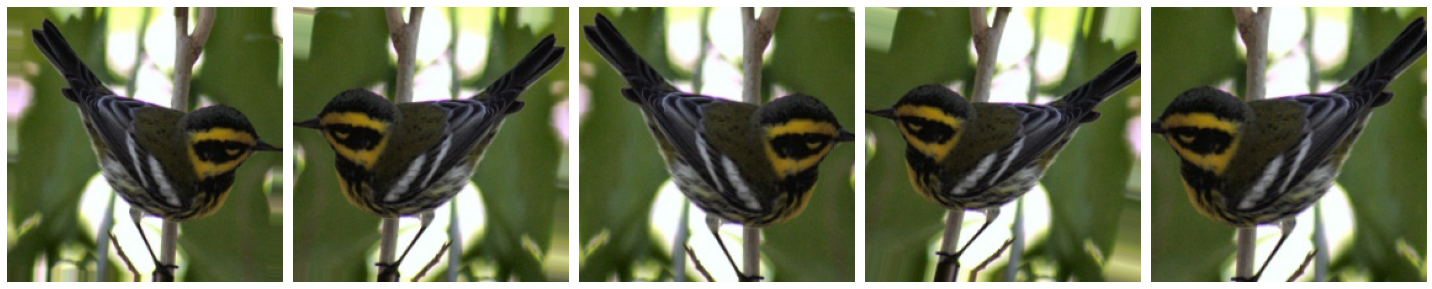

In [3]:
train_path = "./325-bird-species/train"
valid_path = "./325-bird-species/valid"
test_path = "./325-bird-species/test"

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1,
)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
)

validation_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
'''

Check how many train data there are for each class through the code below.

'''

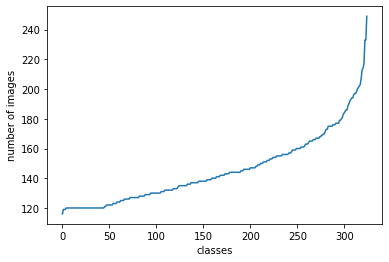

In [5]:
larr = [0] * 325

for i in train_generator.labels :
    larr[i] += 1
    
larr.sort()

x = [i for i in range(325)]

plt.xlabel('classes')
plt.ylabel('number of images')
plt.plot(x, larr)
